# Домашнее задание к лекции «Корреляция и корреляционный анализ»

Задача 1
Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

вывод: 
Визаульно: чем больше жесткость воды, тем ниже смертность.
Когда поделили по локации, видно что данная тенденция не сохраняется для Севера.
Коэффициент детерминации ниже в Северном регионе значит регрессия хуже.
Стоит добавить еще дополнительный данные для анализа, чтоб можно было точно сказать или связать данные два показателя.

In [1]:
from sklearn.datasets import load_boston 
#sklearn для задач МО (для логистической регрессии)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('water.csv',sep= ',')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


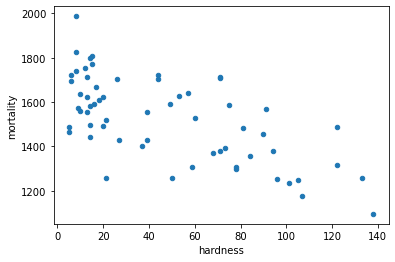

In [6]:
data.plot(kind='scatter', x='hardness', y='mortality')
#чем больше жесткость воды, тем ниже смертность

In [4]:
#коэффициент корреляции Пирсона
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
#коэффициент корреляции Спирмена
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


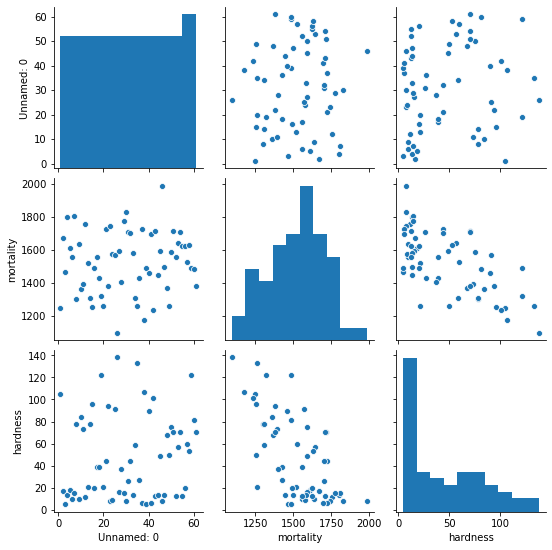

In [7]:
sns.pairplot(data)

In [8]:
data.corr()

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X = data[['mortality']] 
y = data['hardness']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
X_train.shape

(42, 1)

In [15]:
y_train.shape

(42,)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)  
# метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [17]:
model.coef_

array([-0.12670202])

In [18]:
model.intercept_

239.3678426140957

In [19]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

In [20]:
#коэффициент детерминации
model.score(X_test, y_test)

0.4948982822876836

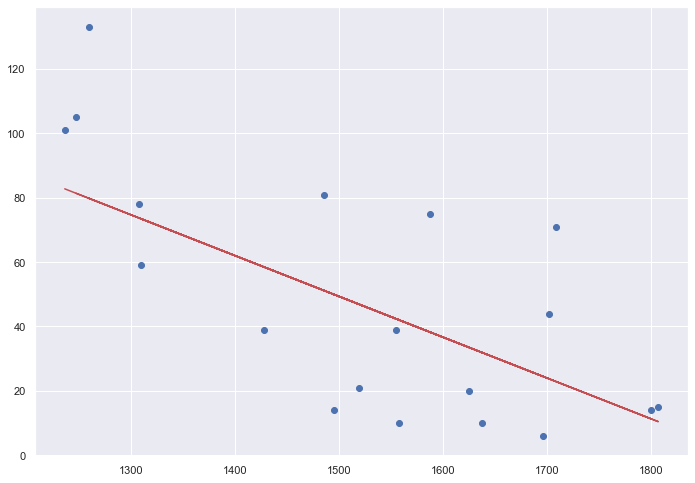

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [27]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [28]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [29]:
X_const.shape

(42, 2)

In [31]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           7.83e-06
Time:                        12:51:25   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

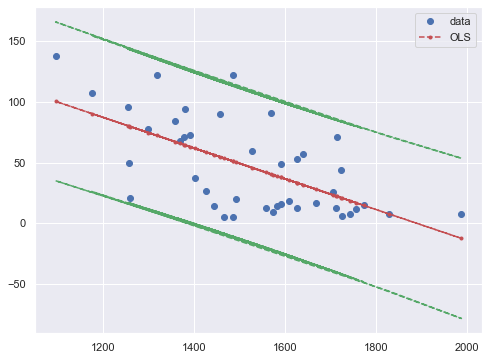

In [32]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

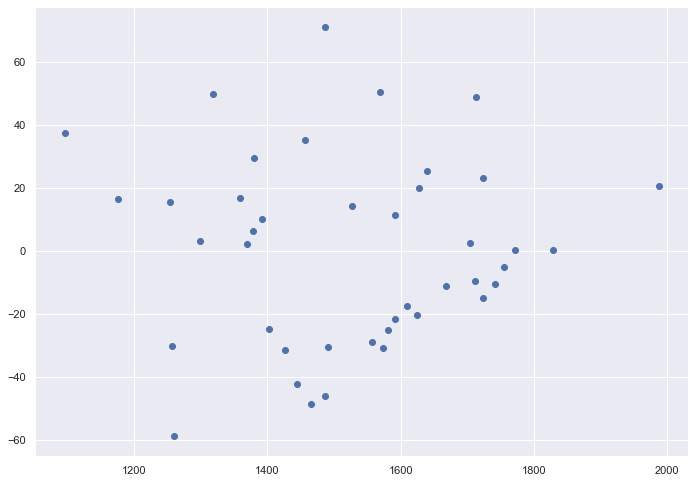

In [33]:
#Остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

# 2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы (сделать 2 датасета)
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [51]:
data_S = data.loc[data.location == 'South']
data_S.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [50]:
data_N = data.loc[data.location == 'North']
data_N.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


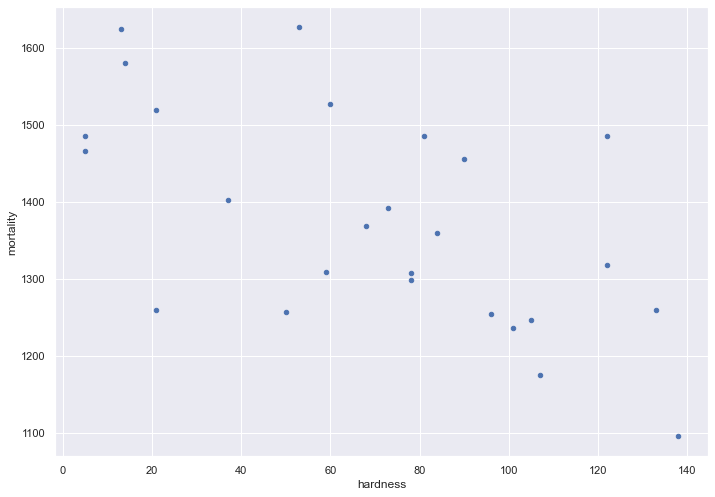

In [48]:
data_S.plot(kind='scatter', x='hardness', y='mortality')
#По Южному району визуально картина сохраняется

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


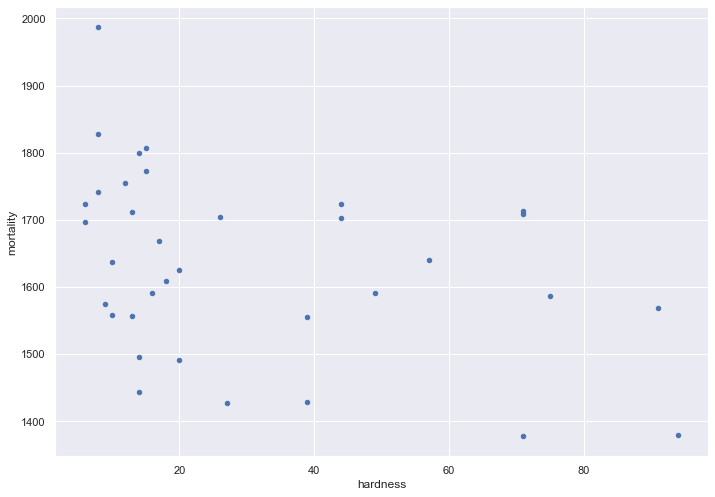

In [49]:
data_N.plot(kind='scatter', x='hardness', y='mortality')
#по Северному району уже видны изменения и смертность высокая и при малой жесткости воды, 
#отсюда можно сделать вывод что мы не можем преполагать, что есть связь между этими двумя показателями 

In [52]:
data_S[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [53]:
data_N[['mortality', 'hardness']].corr()
#показатели по Северному району изменились

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [54]:
data_S[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [55]:
data_N[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [58]:
#рассмотрим Южную часть отдельно
X = data_S[['mortality']] 
y = data_S['hardness']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [61]:
model.coef_

array([-0.18112812])

In [62]:
model.intercept_

324.1190746235987

In [63]:
y_pred = model.predict(X_test)
y_pred

array([85.39221138, 54.96268708, 98.25230796, 54.96268708, 70.17744923,
       95.89764238, 87.02236446, 58.58524949])

In [64]:
#коэффициент детерминации
model.score(X_test, y_test)

-0.052266157944838465

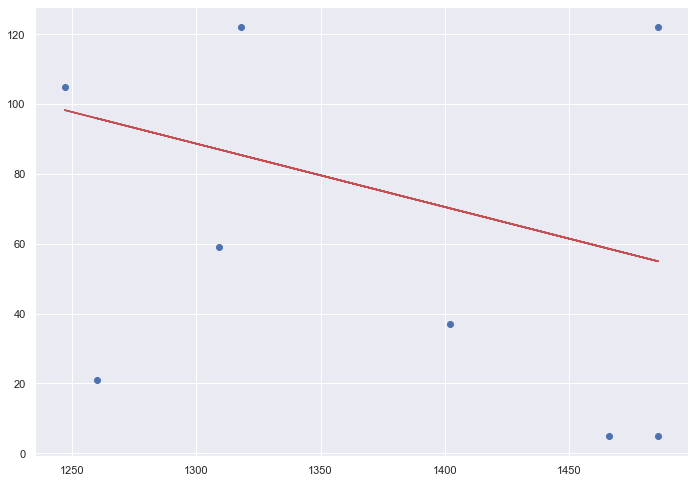

In [65]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
#значения очень далеко расположены от линии

In [66]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [67]:
X_const = sm.add_constant(X_train)

In [69]:
model = sm.OLS(y_train, X_const)
results_S = model.fit()
print(results_S.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           7.30e-05
Time:                        13:24:11   Log-Likelihood:                -80.286
No. Observations:                  18   AIC:                             164.6
Df Residuals:                      16   BIC:                             166.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.1191     47.493      6.825      0.0

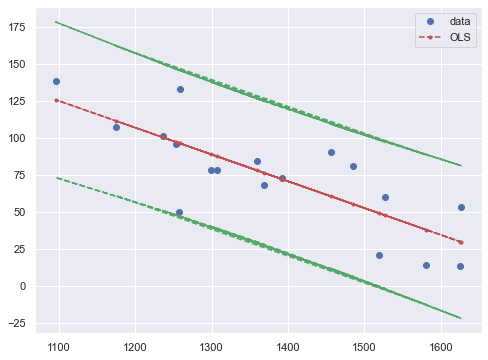

In [70]:
prstd, iv_l, iv_u = wls_prediction_std(results_S) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results_S.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

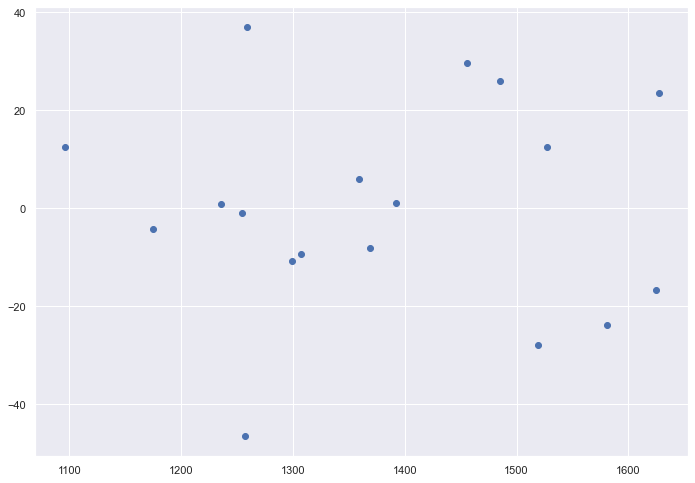

In [71]:
#Остатки
plt.scatter(X_const.iloc[:, 1], results_S.resid)

In [72]:
#теперь Север
X = data_N[['mortality']] 
y = data_N['hardness']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [75]:
model.coef_

array([-0.09774218])

In [76]:
model.intercept_

191.72797679112006

In [77]:
y_pred = model.predict(X_test)
y_pred

array([-2.48573411, 37.88178607, 50.58826942, 23.22045913, 36.22016902,
       24.29562311, 25.37078708, 21.4610999 , 39.73888749, 18.52883451,
       52.1521443 ])

In [78]:
#коэффициент детерминации ниже в Северном регионе значит регрессия хуже
model.score(X_test, y_test)

-0.34863672627416675

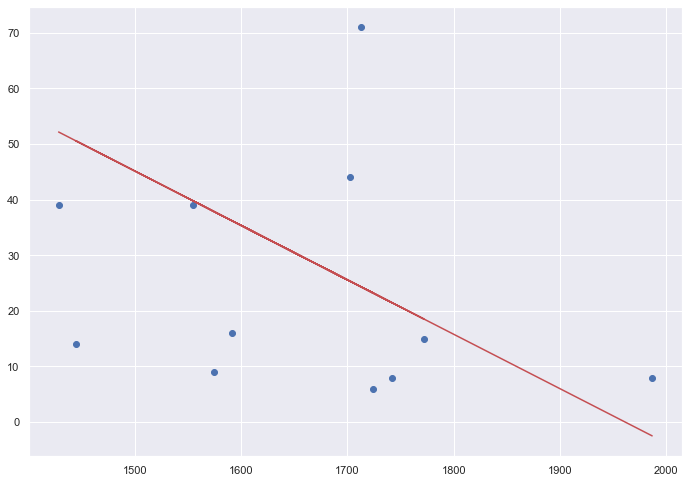

In [79]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
#тут значения уже ближе к линии и прослеживается обратная связь

In [82]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [83]:
X_const = sm.add_constant(X_train)

In [84]:
model = sm.OLS(y_train, X_const)
results_N = model.fit()
print(results_N.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Wed, 04 Nov 2020   Prob (F-statistic):             0.0316
Time:                        13:29:56   Log-Likelihood:                -111.11
No. Observations:                  24   AIC:                             226.2
Df Residuals:                      22   BIC:                             228.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.7280     69.297      2.767      0.0

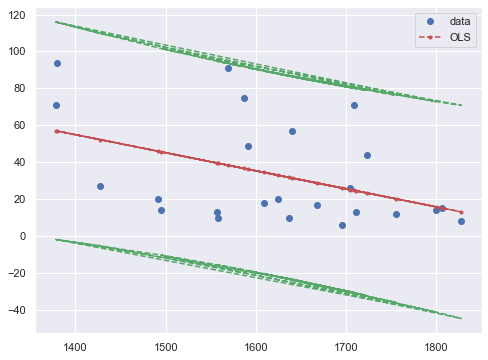

In [86]:
prstd, iv_l, iv_u = wls_prediction_std(results_N) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results_N.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

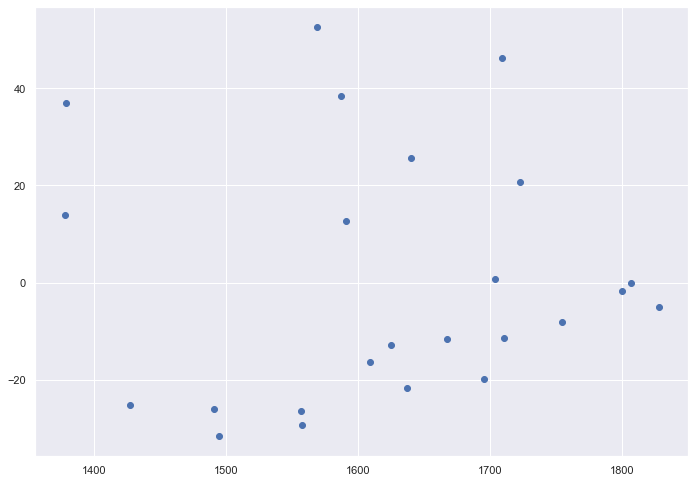

In [88]:
#Остатки
plt.scatter(X_const.iloc[:, 1], results_N.resid)

In [ ]:
https://www.tylervigen.com/spurious-correlations